# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jacimovic (), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import vis_tools as vt
import dla_model as dm
from importlib import reload

## 2. Flow Functions

In [85]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from '/Users/loesbijman/Documents/GitHub/complex-system-simulation/Project/Code/dla_model.py'>

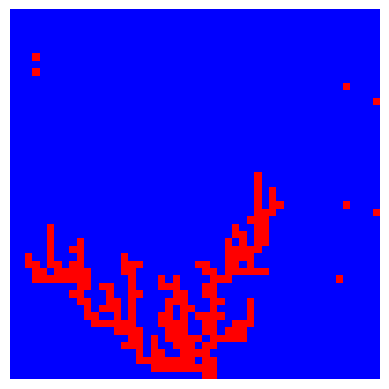

In [86]:
# Time / space parameters
size = 50
steps = 1000

# Initialize lattice
seeds = np.array([(49, 25)])
lattice = dm.init_lattice(size, seeds)

# Initialize particles
particle_density = 0.1
particles = dm.init_particles(lattice, particle_density, gravity = True)

# Arrays for storing time frames
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=(True, True), gravity = True)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None)
    # print(f"step {step}: {current_lattice}")

vt.animate_lattice_2D(particles_frames, interval=10)